<a href="https://colab.research.google.com/github/wildg/Scin-Data-Modeling/blob/eda/EDA_%26_Data_Leakage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pwd
!ls -la
!mkdir -p data/raw
!ls -ld data/raw

/content
total 20
drwxr-xr-x 1 root root 4096 Feb 25 22:10 .
drwxr-xr-x 1 root root 4096 Feb 25 22:08 ..
drwxr-xr-x 4 root root 4096 Jan 16 14:24 .config
drwxr-xr-x 3 root root 4096 Feb 25 22:10 data
drwxr-xr-x 1 root root 4096 Jan 16 14:24 sample_data
drwxr-xr-x 2 root root 4096 Feb 25 22:10 data/raw


In [3]:
!gsutil -m cp -r gs://dx-scin-public-data/** data/raw/

Streaming output truncated to the last 5000 lines.
Copying gs://dx-scin-public-data/dataset/images/1166910403207296452.png...
Copying gs://dx-scin-public-data/dataset/images/1168621935293681649.png...
Copying gs://dx-scin-public-data/dataset/images/1168929444582863219.png...
Copying gs://dx-scin-public-data/dataset/images/1170860713860235539.png...
Copying gs://dx-scin-public-data/dataset/images/1172367779008852489.png...
Copying gs://dx-scin-public-data/dataset/images/1173280857169999078.png...
Copying gs://dx-scin-public-data/dataset/images/1174067969932849040.png...
Copying gs://dx-scin-public-data/dataset/images/1175687802305842761.png...
Copying gs://dx-scin-public-data/dataset/images/1175755111968175112.png...
Copying gs://dx-scin-public-data/dataset/images/1176774025356260928.png...
Copying gs://dx-scin-public-data/dataset/images/1181399278837045247.png...
Copying gs://dx-scin-public-data/dataset/images/1181554434661845910.png...
Copying gs://dx-scin-public-data/dataset/images/1

In [6]:
!gsutil cp gs://dx-scin-public-data/dataset/scin_labels.csv data/

Copying gs://dx-scin-public-data/dataset/scin_labels.csv...
/ [1 files][874.7 KiB/874.7 KiB]                                                
Operation completed over 1 objects/874.7 KiB.                                    


In [7]:
!gsutil cp gs://dx-scin-public-data/dataset/scin_cases.csv data/

Copying gs://dx-scin-public-data/dataset/scin_cases.csv...
/ [1 files][  1.2 MiB/  1.2 MiB]                                                
Operation completed over 1 objects/1.2 MiB.                                      


In [9]:
import pandas as pd
import numpy as np

In [10]:
# Load the cases dataset
cases_df = pd.read_csv("data/scin_cases.csv")
print(f"Cases dataset shape: {cases_df.shape}")
print(f"Number of cases: {len(cases_df)}")
cases_df.head()

Cases dataset shape: (5033, 57)
Number of cases: 5033


,case_id,source,release,year,age_group,sex_at_birth,fitzpatrick_skin_type,race_ethnicity_american_indian_or_alaska_native,race_ethnicity_asian,race_ethnicity_black_or_african_american,...,related_category,condition_duration,image_1_path,image_2_path,image_3_path,image_1_shot_type,image_2_shot_type,image_3_shot_type,combined_race,race_ethnicity_two_or_more_after_mitigation
0,-1000600354148496558,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,RASH,ONE_DAY,dataset/images/-3205742176803893704.png,NaN,NaN,CLOSE_UP,NaN,NaN,NaN,NaN
1,-1002039107727665188,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,NaN,NaN,dataset/images/-4762289084741430925.png,NaN,NaN,CLOSE_UP,NaN,NaN,NaN,NaN
2,-1003358831658393077,SCIN,1.0.0,2023,AGE_18_TO_29,MALE,NONE_IDENTIFIED,NaN,NaN,NaN,...,OTHER_ISSUE_DESCRIPTION,ONE_TO_FOUR_WEEKS,dataset/images/-4027806997035329030.png,NaN,NaN,CLOSE_UP,NaN,NaN,HISPANIC_LATINO_OR_SPANISH_ORIGIN,NaN
3,-1003826561155964328,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,OTHER_ISSUE_DESCRIPTION,ONE_DAY,dataset/images/-5332065579713135540.png,dataset/images/-6353431708064969797.png,dataset/images/742075435141960831.png,AT_DISTANCE,AT_AN_ANGLE,CLOSE_UP,NaN,NaN
4,-1003844406100696311,SCIN,1.0.0,2023,AGE_40_TO_49,FEMALE,FST3,NaN,NaN,NaN,...,RASH,ONE_DAY,dataset/images/-3799298995660217860.png,dataset/images/-5881426422999442186.png,dataset/images/5854025080806696361.png,AT_AN_ANGLE,AT_DISTANCE,CLOSE_UP,WHITE,NaN


In [11]:
# Load the labels dataset
labels_df = pd.read_csv("data/scin_labels.csv")
print(f"Labels dataset shape: {labels_df.shape}")
print(f"Number of labels: {len(labels_df)}")
labels_df.head()

Labels dataset shape: (5033, 17)
Number of labels: 5033


,case_id,dermatologist_gradable_for_skin_condition_1,dermatologist_gradable_for_skin_condition_2,dermatologist_gradable_for_skin_condition_3,dermatologist_skin_condition_on_label_name,dermatologist_skin_condition_confidence,weighted_skin_condition_label,dermatologist_gradable_for_fitzpatrick_skin_type_1,dermatologist_gradable_for_fitzpatrick_skin_type_2,dermatologist_gradable_for_fitzpatrick_skin_type_3,dermatologist_fitzpatrick_skin_type_label_1,dermatologist_fitzpatrick_skin_type_label_2,dermatologist_fitzpatrick_skin_type_label_3,gradable_for_monk_skin_tone_india,gradable_for_monk_skin_tone_us,monk_skin_tone_label_india,monk_skin_tone_label_us
0,-1000600354148496558,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Inflicted skin lesions', 'Eczema', 'Irritant...","[4, 4, 3]","{'Inflicted skin lesions': 0.41, 'Eczema': 0.4...",YES,NaN,NaN,FST2,NaN,NaN,True,True,2.0,1.0
1,-1002039107727665188,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Prurigo nodularis', 'Actinic Keratosis', 'SC...","[4, 3, 4]","{'Prurigo nodularis': 0.41, 'SCC/SCCIS': 0.41,...",YES,NaN,NaN,FST1,NaN,NaN,True,True,3.0,3.0
2,-1003358831658393077,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Impetigo', 'Herpes Zoster', 'Bullous dermati...","[2, 1, 1]","{'Impetigo': 0.55, 'Herpes Zoster': 0.23, 'Bul...",YES,NaN,NaN,FST4,NaN,NaN,True,True,3.0,4.0
3,-1003826561155964328,NO_IMAGE_QUALITY_INSUFFICIENT,NaN,NaN,[],[],{},NO,NaN,NaN,NaN,NaN,NaN,True,True,2.0,4.0
4,-1003844406100696311,DEFAULT_YES_IMAGE_QUALITY_SUFFICIENT,NaN,NaN,"['Lichen planus/lichenoid eruption', 'Follicul...","[1, 1, 1]","{'Lichen planus/lichenoid eruption': 0.33, 'Fo...",YES,NaN,NaN,FST1,NaN,NaN,True,True,1.0,1.0


In [12]:
# Merge datasets on case_id
combined_df = pd.merge(cases_df, labels_df, on="case_id", how="inner")
print(f"Combined dataset shape: {combined_df.shape}")
print(f"Number of rows: {len(combined_df)}")
print(f"Number of columns: {len(combined_df.columns)}")
combined_df.head()

Combined dataset shape: (5033, 73)
Number of rows: 5033
Number of columns: 73


,case_id,source,release,year,age_group,sex_at_birth,fitzpatrick_skin_type,race_ethnicity_american_indian_or_alaska_native,race_ethnicity_asian,race_ethnicity_black_or_african_american,...,dermatologist_gradable_for_fitzpatrick_skin_type_1,dermatologist_gradable_for_fitzpatrick_skin_type_2,dermatologist_gradable_for_fitzpatrick_skin_type_3,dermatologist_fitzpatrick_skin_type_label_1,dermatologist_fitzpatrick_skin_type_label_2,dermatologist_fitzpatrick_skin_type_label_3,gradable_for_monk_skin_tone_india,gradable_for_monk_skin_tone_us,monk_skin_tone_label_india,monk_skin_tone_label_us
0,-1000600354148496558,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,YES,NaN,NaN,FST2,NaN,NaN,True,True,2.0,1.0
1,-1002039107727665188,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,YES,NaN,NaN,FST1,NaN,NaN,True,True,3.0,3.0
2,-1003358831658393077,SCIN,1.0.0,2023,AGE_18_TO_29,MALE,NONE_IDENTIFIED,NaN,NaN,NaN,...,YES,NaN,NaN,FST4,NaN,NaN,True,True,3.0,4.0
3,-1003826561155964328,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,NaN,NaN,NaN,...,NO,NaN,NaN,NaN,NaN,NaN,True,True,2.0,4.0
4,-1003844406100696311,SCIN,1.0.0,2023,AGE_40_TO_49,FEMALE,FST3,NaN,NaN,NaN,...,YES,NaN,NaN,FST1,NaN,NaN,True,True,1.0,1.0


In [13]:
# Display column names
print("Combined dataset columns:")
print(combined_df.columns.tolist())

Combined dataset columns:
['case_id', 'source', 'release', 'year', 'age_group', 'sex_at_birth', 'fitzpatrick_skin_type', 'race_ethnicity_american_indian_or_alaska_native', 'race_ethnicity_asian', 'race_ethnicity_black_or_african_american', 'race_ethnicity_hispanic_latino_or_spanish_origin', 'race_ethnicity_middle_eastern_or_north_african', 'race_ethnicity_native_hawaiian_or_pacific_islander', 'race_ethnicity_white', 'race_ethnicity_other_race', 'race_ethnicity_prefer_not_to_answer', 'textures_raised_or_bumpy', 'textures_flat', 'textures_rough_or_flaky', 'textures_fluid_filled', 'body_parts_head_or_neck', 'body_parts_arm', 'body_parts_palm', 'body_parts_back_of_hand', 'body_parts_torso_front', 'body_parts_torso_back', 'body_parts_genitalia_or_groin', 'body_parts_buttocks', 'body_parts_leg', 'body_parts_foot_top_or_side', 'body_parts_foot_sole', 'body_parts_other', 'condition_symptoms_bothersome_appearance', 'condition_symptoms_bleeding', 'condition_symptoms_increasing_size', 'condition_

In [14]:
combined_df.columns

Index(['case_id', 'source', 'release', 'year', 'age_group', 'sex_at_birth',
       'fitzpatrick_skin_type',
       'race_ethnicity_american_indian_or_alaska_native',
       'race_ethnicity_asian', 'race_ethnicity_black_or_african_american',
       'race_ethnicity_hispanic_latino_or_spanish_origin',
       'race_ethnicity_middle_eastern_or_north_african',
       'race_ethnicity_native_hawaiian_or_pacific_islander',
       'race_ethnicity_white', 'race_ethnicity_other_race',
       'race_ethnicity_prefer_not_to_answer', 'textures_raised_or_bumpy',
       'textures_flat', 'textures_rough_or_flaky', 'textures_fluid_filled',
       'body_parts_head_or_neck', 'body_parts_arm', 'body_parts_palm',
       'body_parts_back_of_hand', 'body_parts_torso_front',
       'body_parts_torso_back', 'body_parts_genitalia_or_groin',
       'body_parts_buttocks', 'body_parts_leg', 'body_parts_foot_top_or_side',
       'body_parts_foot_sole', 'body_parts_other',
       'condition_symptoms_bothersome_appearan

In [15]:
combined_df['weighted_skin_condition_label']

,weighted_skin_condition_label
0,"{'Inflicted skin lesions': 0.41, 'Eczema': 0.4..."
1,"{'Prurigo nodularis': 0.41, 'SCC/SCCIS': 0.41,..."
2,"{'Impetigo': 0.55, 'Herpes Zoster': 0.23, 'Bul..."
3,{}
4,"{'Lichen planus/lichenoid eruption': 0.33, 'Fo..."
...,...
5028,"{'CD - Contact dermatitis': 0.33, 'Allergic Co..."
5029,{}
5030,"{'Impetigo': 0.5, 'Foreign body': 0.5}"
5031,"{'Erythema gyratum repens': 0.33, 'Seborrheic ..."


In [16]:
df = combined_df.copy()

In [17]:
print("Current number of rows:", len(df))

Current number of rows: 5033


In [18]:
df.columns

Index(['case_id', 'source', 'release', 'year', 'age_group', 'sex_at_birth',
       'fitzpatrick_skin_type',
       'race_ethnicity_american_indian_or_alaska_native',
       'race_ethnicity_asian', 'race_ethnicity_black_or_african_american',
       'race_ethnicity_hispanic_latino_or_spanish_origin',
       'race_ethnicity_middle_eastern_or_north_african',
       'race_ethnicity_native_hawaiian_or_pacific_islander',
       'race_ethnicity_white', 'race_ethnicity_other_race',
       'race_ethnicity_prefer_not_to_answer', 'textures_raised_or_bumpy',
       'textures_flat', 'textures_rough_or_flaky', 'textures_fluid_filled',
       'body_parts_head_or_neck', 'body_parts_arm', 'body_parts_palm',
       'body_parts_back_of_hand', 'body_parts_torso_front',
       'body_parts_torso_back', 'body_parts_genitalia_or_groin',
       'body_parts_buttocks', 'body_parts_leg', 'body_parts_foot_top_or_side',
       'body_parts_foot_sole', 'body_parts_other',
       'condition_symptoms_bothersome_appearan

/tmp/ipython-input-532/3160607478.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  converted_body_parts[col] = df[col].replace({'YES': True, 'NO': False}).fillna(False).astype(int)
/tmp/ipython-input-532/3160607478.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  converted_body_parts[col] = df[col].replace({'YES': True, 'NO': False}).fillna(False).astype(int)
/tmp/ipython-input-532/3160607478.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_object

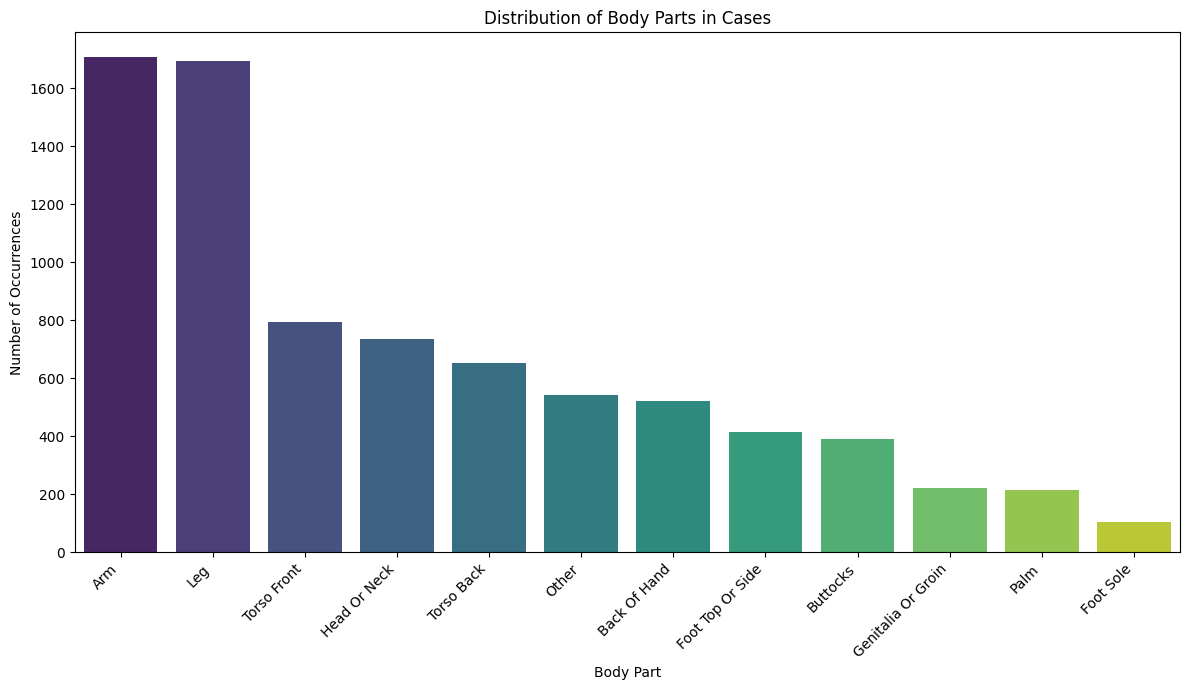

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Identify body part columns
body_part_columns = [col for col in df.columns if col.startswith('body_parts_')]

# Initialize a DataFrame to store the converted boolean/integer values
converted_body_parts = pd.DataFrame(index=df.index)

for col in body_part_columns:
    converted_body_parts[col] = df[col].replace({'YES': True, 'NO': False}).fillna(False).astype(int)

# Sum the occurrences for each body part from the converted DataFrame
body_part_counts = converted_body_parts.sum().sort_values(ascending=False)

# Clean up column names for better visualization
body_part_labels = [col.replace('body_parts_', '').replace('_', ' ').title() for col in body_part_counts.index]

# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=body_part_labels, y=body_part_counts.values, palette='viridis')
plt.xlabel('Body Part')
plt.ylabel('Number of Occurrences')
plt.title('Distribution of Body Parts in Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

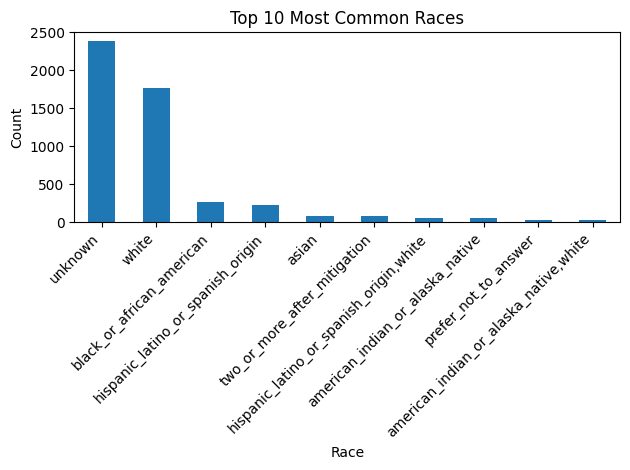

In [29]:
import matplotlib.pyplot as plt

# Clean race column
race_clean = (
    df['combined_race']
    .fillna('unknown')
    .str.strip()
    .str.lower()
    .str.replace(' ', '_', regex=False)
)

# Top 10 races
top10 = race_clean.value_counts().nlargest(10)

plt.figure()
top10.plot(kind='bar')

plt.title('Top 10 Most Common Races')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

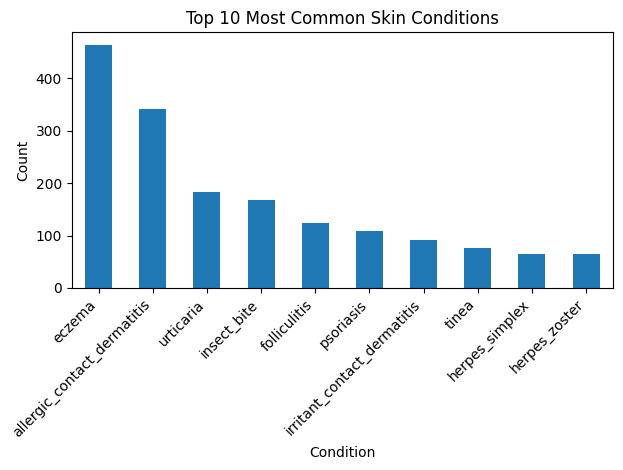

In [33]:
import ast
# most common skin conditions
conditions = combined_df['weighted_skin_condition_label'].dropna()

# Convert string dict → real dict
conditions = conditions.apply(ast.literal_eval)

# Convert each dict into rows
exploded = conditions.apply(pd.Series).stack()

# exploded = MultiIndex (row_id, condition)
exploded = exploded.reset_index()
exploded.columns = ['case_id', 'condition', 'weight']

condition_counts = (
    exploded.groupby('condition')['weight']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

condition_counts.index = (
    condition_counts.index
    .str.lower()
    .str.replace(r'[^a-z0-9]+', '_', regex=True)
    .str.strip('_')
)

import matplotlib.pyplot as plt

plt.figure()
condition_counts.plot(kind='bar')

plt.title('Top 10 Most Common Skin Conditions')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [34]:
combined_df.shape
combined_df.info()
combined_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 73 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   case_id                                             5033 non-null   int64  
 1   source                                              5033 non-null   object 
 2   release                                             5033 non-null   object 
 3   year                                                5033 non-null   int64  
 4   age_group                                           5032 non-null   object 
 5   sex_at_birth                                        5032 non-null   object 
 6   fitzpatrick_skin_type                               2503 non-null   object 
 7   race_ethnicity_american_indian_or_alaska_native     73 non-null     object 
 8   race_ethnicity_asian                                96 non-null     object 
 9

,case_id,year,monk_skin_tone_label_india,monk_skin_tone_label_us
count,5.033000e+03,5033.0,5019.000000,5005.000000
mean,-2.487811e+16,2023.0,2.699542,3.050350
std,5.322911e+18,0.0,1.050433,1.576031
min,-9.223126e+18,2023.0,1.000000,1.000000
25%,-4.654656e+18,2023.0,2.000000,2.000000
50%,-6.204642e+16,2023.0,2.000000,3.000000
75%,4.543631e+18,2023.0,3.000000,4.000000
max,9.222737e+18,2023.0,9.000000,10.000000


In [37]:
# missing values
combined_df.isna().sum().sort_values(ascending=False)

,0
race_ethnicity_native_hawaiian_or_pacific_islander,5029
race_ethnicity_middle_eastern_or_north_african,5026
race_ethnicity_other_race,5017
race_ethnicity_prefer_not_to_answer,4999
race_ethnicity_american_indian_or_alaska_native,4960
...,...
dermatologist_gradable_for_fitzpatrick_skin_type_1,0
dermatologist_gradable_for_skin_condition_1,0
weighted_skin_condition_label,0
dermatologist_skin_condition_confidence,0


In [38]:
# age group
df['age_group'].value_counts()

,count
age_group,
AGE_UNKNOWN,2864
AGE_18_TO_29,769
AGE_40_TO_49,435
AGE_30_TO_39,422
AGE_50_TO_59,322
AGE_60_TO_69,165
AGE_70_TO_79,55


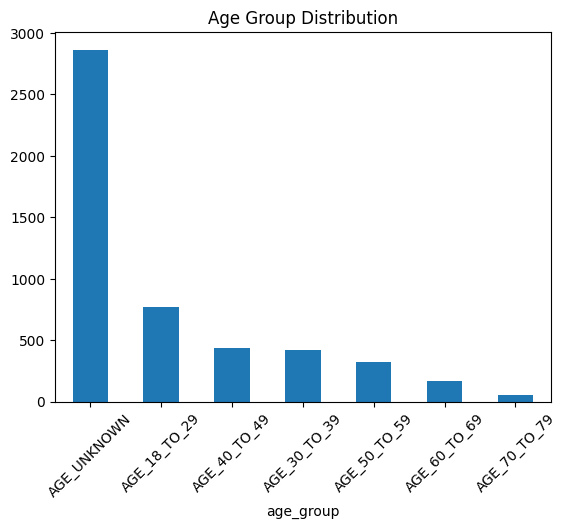

In [39]:
df['age_group'].value_counts().plot(kind='bar')
plt.title('Age Group Distribution')
plt.xticks(rotation=45)
plt.show()

In [42]:
df['sex_at_birth'].value_counts()

,count
sex_at_birth,
OTHER_OR_UNSPECIFIED,2559
FEMALE,1666
MALE,807


In [43]:
df['fitzpatrick_skin_type'].value_counts()

,count
fitzpatrick_skin_type,
FST3,661
FST2,542
FST4,427
NONE_IDENTIFIED,328
FST5,214
FST1,188
FST6,143


In [45]:
# class imbalance
exploded['condition'].value_counts(normalize=True).head(10)

,proportion
condition,
Eczema,0.139886
Allergic Contact Dermatitis,0.115644
Insect Bite,0.053385
Urticaria,0.043979
Psoriasis,0.040800
Folliculitis,0.035501
Irritant Contact Dermatitis,0.032985
Tinea,0.027288
Drug Rash,0.019605


In [46]:
# conditions vs age group
pd.crosstab(df['age_group'], exploded['condition'])

condition,AKV - Acrokeratosis verruciformis,Abrasion and/or friction burn of lower limb without infection,Abrasion of wrist,"Abrasion, scrape, or scab",Abscess,Acanthosis nigricans,Acne,Acne keloidalis,Acne urticata,Acral erythema,...,deep vein thrombosis,granular parakeratosis,panniculitis of skin,pathergy,post-sunburn peeling/superficial desquamation,relapsing polychondritis,resolving dermatitis,scurvy,varicose vein,wound/abrasion
age_group,,,,,,,,,,,,,,,,,,,,,
AGE_18_TO_29,0,1,1,6,3,0,10,1,1,0,...,0,0,1,0,0,0,0,0,0,0
AGE_30_TO_39,0,0,0,5,2,0,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
AGE_40_TO_49,0,0,0,6,5,0,6,0,0,0,...,0,0,0,0,1,0,0,0,0,0
AGE_50_TO_59,0,0,1,0,1,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGE_60_TO_69,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGE_70_TO_79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGE_UNKNOWN,2,0,0,16,17,4,32,1,0,0,...,1,1,0,1,0,1,1,1,1,1


In [47]:
# condition vs sex
pd.crosstab(df['sex_at_birth'], exploded['condition'])

condition,AKV - Acrokeratosis verruciformis,Abrasion and/or friction burn of lower limb without infection,Abrasion of wrist,"Abrasion, scrape, or scab",Abscess,Acanthosis nigricans,Acne,Acne keloidalis,Acne urticata,Acral erythema,...,deep vein thrombosis,granular parakeratosis,panniculitis of skin,pathergy,post-sunburn peeling/superficial desquamation,relapsing polychondritis,resolving dermatitis,scurvy,varicose vein,wound/abrasion
sex_at_birth,,,,,,,,,,,,,,,,,,,,,
FEMALE,0,0,1,11,9,0,29,0,1,1,...,0,0,0,0,1,0,0,0,0,0
MALE,0,1,1,10,5,0,9,1,0,0,...,0,0,1,0,0,0,0,0,0,0
OTHER_OR_UNSPECIFIED,2,0,0,12,15,4,24,1,0,0,...,1,1,0,1,0,1,1,1,1,1


In [48]:
# symptoms vs conditions
pd.crosstab(df['condition_symptoms_itching'], exploded['condition'])

condition,AKV - Acrokeratosis verruciformis,Abrasion and/or friction burn of lower limb without infection,Abrasion of wrist,"Abrasion, scrape, or scab",Abscess,Acanthosis nigricans,Acne,Acne keloidalis,Acne urticata,Acral erythema,...,deep vein thrombosis,granular parakeratosis,panniculitis of skin,pathergy,post-sunburn peeling/superficial desquamation,relapsing polychondritis,resolving dermatitis,scurvy,varicose vein,wound/abrasion
condition_symptoms_itching,,,,,,,,,,,,,,,,,,,,,
0.0,2,1,2,33,29,4,62,2,1,1,...,1,1,1,1,1,1,1,1,1,1


In [51]:
# check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [53]:
# unexpected columns
df['age_group'].unique()
df['sex_at_birth'].unique()

array(['OTHER_OR_UNSPECIFIED', 'MALE', 'FEMALE', nan], dtype=object)

In [55]:
# data leakage
leakage_cols = [c for c in df.columns if 'dermatologist' in c.lower()]
leakage_cols

['dermatologist_gradable_for_skin_condition_1',
 'dermatologist_gradable_for_skin_condition_2',
 'dermatologist_gradable_for_skin_condition_3',
 'dermatologist_skin_condition_on_label_name',
 'dermatologist_skin_condition_confidence',
 'dermatologist_gradable_for_fitzpatrick_skin_type_1',
 'dermatologist_gradable_for_fitzpatrick_skin_type_2',
 'dermatologist_gradable_for_fitzpatrick_skin_type_3',
 'dermatologist_fitzpatrick_skin_type_label_1',
 'dermatologist_fitzpatrick_skin_type_label_2',
 'dermatologist_fitzpatrick_skin_type_label_3']

Several features contain dermatologist provided labels and confidence scores, these variables are derived from expert evaluation and would not be available in a real-world prediction setting. Including them as predictors would introduce data leakage, resulting in overly optimistic model performance. Therefore, these variables will be excluded from  modeling.

In [57]:
# modelling safe dataset
df_model = df.drop(columns=leakage_cols)
df_model.shape

(5033, 62)

In [58]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 62 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   case_id                                             5033 non-null   int64  
 1   source                                              5033 non-null   object 
 2   release                                             5033 non-null   object 
 3   year                                                5033 non-null   int64  
 4   age_group                                           5032 non-null   object 
 5   sex_at_birth                                        5032 non-null   object 
 6   fitzpatrick_skin_type                               2503 non-null   object 
 7   race_ethnicity_american_indian_or_alaska_native     73 non-null     object 
 8   race_ethnicity_asian                                96 non-null     object 
 9

In [59]:
df[leakage_cols].nunique()

,0
dermatologist_gradable_for_skin_condition_1,3
dermatologist_gradable_for_skin_condition_2,3
dermatologist_gradable_for_skin_condition_3,3
dermatologist_skin_condition_on_label_name,1715
dermatologist_skin_condition_confidence,547
dermatologist_gradable_for_fitzpatrick_skin_type_1,2
dermatologist_gradable_for_fitzpatrick_skin_type_2,2
dermatologist_gradable_for_fitzpatrick_skin_type_3,2
dermatologist_fitzpatrick_skin_type_label_1,6
dermatologist_fitzpatrick_skin_type_label_2,6
